In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

**Подлючаем диск**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Считываем данные с диска**

In [3]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train.csv')
train_data.head(20)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
5,1,55,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
6,2,1,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016000
7,2,6,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016000
8,2,11,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759994,1.016000
9,2,16,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016000


**Переводим все данные во float**

In [4]:
train_data[train_data.columns[1:]] = train_data[train_data.columns[1:]].astype(np.float32)
train_data.head(20)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
5,1,55.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
6,2,1.0,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016001
7,2,6.0,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,NaN,NaN,NaN,1.409988,1.016001
8,2,11.0,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,NaN,-0.350006,1.759995,1.016001
9,2,16.0,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016001


In [5]:
train_id = train_data[~np.isnan(train_data.Ref)].Id.unique()
train_new_data = train_data[np.in1d(train_data.Id, train_id)]
del train_data, train_id
train_new_data.shape

(9125329, 24)

Заполняем NaN

In [6]:
train_new_data = train_new_data.fillna(0.0)
train_new_data = train_new_data.reset_index(drop=True)
train_new_data.head(20)

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,2,1.0,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016001
1,2,6.0,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,0.000000,0.000000,0.000000,1.409988,1.016001
2,2,11.0,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,0.000000,-0.350006,1.759995,1.016001
3,2,16.0,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016001
4,2,21.0,2.0,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,0.995000,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759995,1.016001
5,2,26.0,2.0,12.0,12.0,16.0,20.0,16.5,17.0,19.0,21.0,0.998333,0.995000,0.998333,0.998333,0.5625,0.2500,0.4375,0.6875,-1.760010,-1.760010,-0.350006,0.709991,1.016001
6,2,31.0,2.0,22.5,19.0,22.0,25.0,26.0,23.5,25.5,27.5,0.998333,0.995000,0.998333,1.001667,0.0000,-0.1875,0.2500,0.6250,-1.059998,-2.120010,-0.710007,0.349991,1.016001
7,2,37.0,2.0,14.0,14.0,18.5,21.0,19.5,20.0,21.0,23.0,0.998333,0.991667,0.998333,0.998333,0.5000,0.1875,0.4375,0.8125,0.000000,-1.760010,-0.350006,1.059998,1.016001
8,2,42.0,2.0,12.0,11.0,12.5,17.0,19.5,18.0,21.0,23.0,0.998333,0.995000,0.998333,0.998333,0.6250,0.3750,0.6250,0.8750,-0.350006,-0.350006,0.000000,0.349991,1.016001
9,2,47.0,2.0,1.5,3.5,7.0,10.5,18.0,16.5,18.5,21.5,0.998333,0.995000,0.998333,0.998333,0.3750,0.1875,0.5000,0.6875,0.349991,-2.110001,-0.350006,1.059998,1.016001


In [7]:
df_temp = pd.DataFrame(train_new_data.groupby('Id')['Expected'].mean()) # mean, or any value (the same for all)
meaningful_ids = np.array(df_temp[df_temp['Expected'] < 70].index)
del df_temp
train_final = train_new_data[np.in1d(train_new_data.Id, meaningful_ids)]
del train_new_data, meaningful_ids
train_final.shape

(8914175, 24)

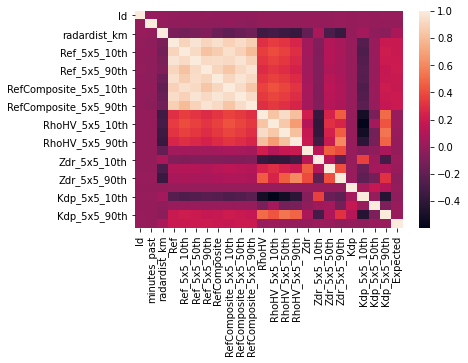

In [ ]:
sns.heatmap(train_final.corr(), annot = False)

In [8]:
y = train_final['Expected'].values
y

array([1.0160005, 1.0160005, 1.0160005, ..., 8.636004 , 8.636004 ,
       8.636004 ], dtype=float32)

In [9]:
x = train_final.drop('Expected', axis=1).values
x

array([[ 2.00000000e+00,  1.00000000e+00,  2.00000000e+00, ...,
        -1.41000366e+00, -3.50006104e-01,  1.05999756e+00],
       [ 2.00000000e+00,  6.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.40998840e+00],
       [ 2.00000000e+00,  1.10000000e+01,  2.00000000e+00, ...,
         0.00000000e+00, -3.50006104e-01,  1.75999451e+00],
       ...,
       [ 1.18094500e+06,  4.70000000e+01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  1.33799896e+01],
       [ 1.18094500e+06,  5.20000000e+01,  9.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.18094500e+06,  5.70000000e+01,  9.00000000e+00, ...,
         0.00000000e+00, -8.02999878e+00,  6.06999207e+00]])

In [10]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [11]:
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(x.shape[1],)))
model.add(Dense(800, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              24000     
_________________________________________________________________
dense_1 (Dense)              (None, 800)               800800    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 1,245,601
Trainable params: 1,245,601
Non-trainable params: 0
______________________________________________

In [12]:
model.compile(optimizer='adadelta', loss='mae')

In [13]:
history = model.fit(train_x, train_y, epochs=15, batch_size=1024, verbose=1, validation_split=0.2)
history = history.history

Epoch 1/15
4875/4875 [==============================] - 22s 5ms/step - loss: 264.1942 - val_loss: 393.5577
Epoch 2/15
4875/4875 [==============================] - 22s 4ms/step - loss: 363.8255 - val_loss: 416.8207
Epoch 3/15
4875/4875 [==============================] - 22s 4ms/step - loss: 377.4884 - val_loss: 389.2613
Epoch 4/15
4875/4875 [==============================] - 22s 5ms/step - loss: 309.9579 - val_loss: 170.2216
Epoch 5/15
4875/4875 [==============================] - 22s 5ms/step - loss: 292.5532 - val_loss: 196.5583
Epoch 6/15
4875/4875 [==============================] - 22s 5ms/step - loss: 248.9223 - val_loss: 275.8386
Epoch 7/15
4875/4875 [==============================] - 22s 5ms/step - loss: 192.7028 - val_loss: 202.4686
Epoch 8/15
4875/4875 [==============================] - 22s 5ms/step - loss: 140.9822 - val_loss: 98.3387
Epoch 9/15
4875/4875 [==============================] - 23s 5ms/step - loss: 107.8150 - val_loss: 39.3080
Epoch 10/15
4875/4875 [================

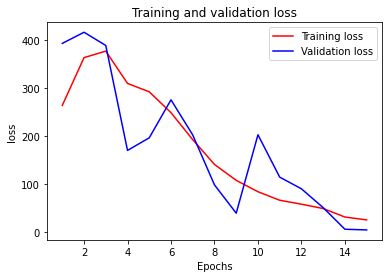

In [14]:
mae = history['loss']
val_mae = history['val_loss']
epochs = range(1, len(history['loss']) + 1)
plt.plot(epochs, mae, 'r', label='Training loss')
plt.plot(epochs, val_mae, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
pred = model.predict(test_x)
pred

array([[0.57389313],
       [2.3885438 ],
       [0.6143611 ],
       ...,
       [0.7170972 ],
       [2.2647038 ],
       [2.5609043 ]], dtype=float32)

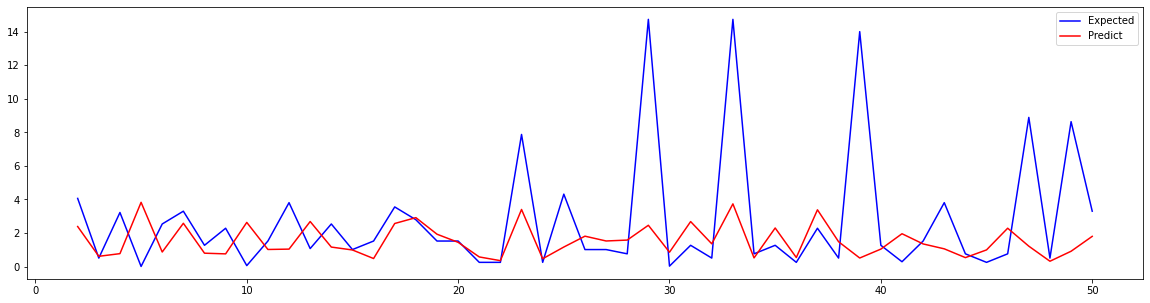

<Figure size 432x288 with 0 Axes>

In [11]:
x = range(2, 51);
plt.figure(figsize=(20,5))
plt.plot(x, test_y[1:50:1],  'b', label='Expected')
plt.plot(x, pred[1:50:1],  'r', label='Predict')
plt.legend()
plt.show()
plt.clf()

[[1.         0.69689686]
 [0.69689686 1.        ]]


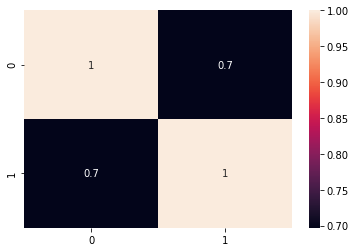

In [10]:
pred = pred.flatten()
y = test_y.flatten()
print(np.corrcoef(pred, y))
sns.heatmap(np.corrcoef(pred, y), annot=True)